<a href="https://colab.research.google.com/github/sachyuth08/achyuth_sambaraju/blob/main/Credit_Risk_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Risk Analysis
---

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR, SVC
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import statsmodels.api as sm
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTEN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
cookie = pd.read_excel("/content/drive/My Drive/IS670_data/jstdatasetr6.xlsx")
cookie

,year,country,iso,ifs,pop,rgdpmad,rgdpbarro,rconsbarro,gdp,iy,...,eq_capgain,eq_dp,eq_capgain_interp,eq_tr_interp,eq_dp_interp,bond_rate,eq_div_rtn,capital_tr,risky_tr,safe_tr
0,1870,Australia,AUS,193,1775.000000,3273.239437,13.836157,21.449734,208.78,0.109266,...,-0.070045,0.071417,NaN,NaN,NaN,0.049118,0.066415,NaN,NaN,NaN
1,1871,Australia,AUS,193,1675.000000,3298.507463,13.936864,19.930801,211.56,0.104579,...,0.041654,0.065466,NaN,NaN,NaN,0.048446,0.068193,NaN,NaN,NaN
2,1872,Australia,AUS,193,1722.000000,3553.426249,15.044247,21.085006,227.40,0.130438,...,0.108945,0.062997,NaN,NaN,NaN,0.047373,0.069861,NaN,NaN,NaN
3,1873,Australia,AUS,193,1769.000000,3823.629169,16.219443,23.254910,266.54,0.124986,...,0.083086,0.064484,NaN,NaN,NaN,0.046720,0.069842,NaN,NaN,NaN
4,1874,Australia,AUS,193,1822.000000,3834.796926,16.268228,23.458050,287.58,0.141960,...,0.119389,0.063503,NaN,NaN,NaN,0.046533,0.071085,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2713,2016,USA,USA,111,322701.246359,33012.767871,108.756035,108.051774,18695.10,0.195831,...,0.014868,0.021309,NaN,NaN,NaN,0.018417,0.021626,0.048536,0.067177,0.003139
2714,2017,USA,USA,111,324756.935396,33543.679862,110.591099,109.978043,19479.60,0.204547,...,0.170363,0.019363,NaN,NaN,NaN,0.023300,0.022662,0.121381,0.160881,0.017584
2715,2018,USA,USA,111,326497.132575,34338.770756,113.306861,112.567306,20527.20,0.208586,...,0.121093,0.018716,NaN,NaN,NaN,0.029100,0.020982,0.092210,0.129585,0.000581
2716,2019,USA,USA,111,328018.681916,34961.835051,115.229692,114.509455,21372.60,0.210205,...,0.061144,0.019312,NaN,NaN,NaN,0.021442,0.020492,0.080606,0.084776,0.070134


In [ ]:
cookie.keys()

Index(['year', 'country', 'iso', 'ifs', 'pop', 'rgdpmad', 'rgdpbarro',
       'rconsbarro', 'gdp', 'iy', 'cpi', 'ca', 'imports', 'exports', 'narrowm',
       'money', 'stir', 'ltrate', 'hpnom', 'unemp', 'wage', 'debtgdp',
       'revenue', 'expenditure', 'xrusd', 'tloans', 'tmort', 'thh', 'tbus',
       'bdebt', 'lev', 'ltd', 'noncore', 'crisisJST', 'crisisJST_old', 'peg',
       'peg_strict', 'peg_type', 'peg_base', 'JSTtrilemmaIV', 'eq_tr',
       'housing_tr', 'bond_tr', 'bill_rate', 'rent_ipolated',
       'housing_capgain_ipolated', 'housing_capgain', 'housing_rent_rtn',
       'housing_rent_yd', 'eq_capgain', 'eq_dp', 'eq_capgain_interp',
       'eq_tr_interp', 'eq_dp_interp', 'bond_rate', 'eq_div_rtn', 'capital_tr',
       'risky_tr', 'safe_tr'],
      dtype='object')

In [ ]:
print("Descriptive statistics for the entire dataset:")
print(cookie.describe(), "\n")

Descriptive statistics for the entire dataset:
             year          ifs            pop       rgdpmad    rgdpbarro  \
count  2718.00000  2718.000000    2667.000000   2666.000000  2664.000000   
mean   1945.00000   148.333333   31439.397574   9155.064763    39.793748   
std      43.59701    24.165940   45898.993728   7976.190143    33.884462   
min    1870.00000   111.000000    1675.000000    737.375497     3.263085   
25%    1907.00000   132.000000    4866.650000   2873.047663    12.694448   
50%    1945.00000   143.000000   10113.530000   5477.011227    23.056114   
75%    1983.00000   172.000000   45077.000000  14619.435708    65.770534   
max    2020.00000   193.000000  329239.715278  45887.569802   147.282620   

        rconsbarro           gdp           iy           cpi            ca  \
count  2561.000000  2.641000e+03  2425.000000  2.666000e+03  2.489000e+03   
mean     42.133609  2.454826e+06     0.188838  4.191118e+01 -4.572271e+04   
std      32.274402  1.615548e+07     

In [ ]:
cookie.isnull().sum()

year                           0
country                        0
iso                            0
ifs                            0
pop                           51
rgdpmad                       52
rgdpbarro                     54
rconsbarro                   157
gdp                           77
iy                           293
cpi                           52
ca                           229
imports                      115
exports                      115
narrowm                      114
money                        200
stir                         198
ltrate                        88
hpnom                        668
unemp                        769
wage                          88
debtgdp                      229
revenue                      176
expenditure                  157
xrusd                         53
tloans                       253
tmort                        406
thh                         1344
tbus                        1419
bdebt                        853
lev       

In [ ]:
cookie.drop(['thh', 'tbus', 'bdebt', 'JSTtrilemmaIV', 'housing_tr',
    'rent_ipolated', 'housing_capgain_ipolated', 'eq_capgain_interp',
    'eq_tr_interp', 'eq_dp_interp'], axis=1, inplace=True)
cookie

,year,country,iso,ifs,pop,rgdpmad,rgdpbarro,rconsbarro,gdp,iy,...,housing_capgain,housing_rent_rtn,housing_rent_yd,eq_capgain,eq_dp,bond_rate,eq_div_rtn,capital_tr,risky_tr,safe_tr
0,1870,Australia,AUS,193,1775.000000,3273.239437,13.836157,21.449734,208.78,0.109266,...,NaN,NaN,NaN,-0.070045,0.071417,0.049118,0.066415,NaN,NaN,NaN
1,1871,Australia,AUS,193,1675.000000,3298.507463,13.936864,19.930801,211.56,0.104579,...,-0.045456,NaN,NaN,0.041654,0.065466,0.048446,0.068193,NaN,NaN,NaN
2,1872,Australia,AUS,193,1722.000000,3553.426249,15.044247,21.085006,227.40,0.130438,...,0.031747,NaN,NaN,0.108945,0.062997,0.047373,0.069861,NaN,NaN,NaN
3,1873,Australia,AUS,193,1769.000000,3823.629169,16.219443,23.254910,266.54,0.124986,...,-0.030770,NaN,NaN,0.083086,0.064484,0.046720,0.069842,NaN,NaN,NaN
4,1874,Australia,AUS,193,1822.000000,3834.796926,16.268228,23.458050,287.58,0.141960,...,0.206350,NaN,NaN,0.119389,0.063503,0.046533,0.071085,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2713,2016,USA,USA,111,322701.246359,33012.767871,108.756035,108.051774,18695.10,0.195831,...,0.058300,0.049627,0.046894,0.014868,0.021309,0.018417,0.021626,0.048536,0.067177,0.003139
2714,2017,USA,USA,111,324756.935396,33543.679862,110.591099,109.978043,19479.60,0.204547,...,0.064388,0.048682,0.045737,0.170363,0.019363,0.023300,0.022662,0.121381,0.160881,0.017584
2715,2018,USA,USA,111,326497.132575,34338.770756,113.306861,112.567306,20527.20,0.208586,...,0.065539,0.047392,0.044477,0.121093,0.018716,0.029100,0.020982,0.092210,0.129585,0.000581
2716,2019,USA,USA,111,328018.681916,34961.835051,115.229692,114.509455,21372.60,0.210205,...,0.043160,0.046125,0.044217,0.061144,0.019312,0.021442,0.020492,0.080606,0.084776,0.070134


In [ ]:
cookie.dtypes

year                  int64
country              object
iso                  object
ifs                   int64
pop                 float64
rgdpmad             float64
rgdpbarro           float64
rconsbarro          float64
gdp                 float64
iy                  float64
cpi                 float64
ca                  float64
imports             float64
exports             float64
narrowm             float64
money               float64
stir                float64
ltrate              float64
hpnom               float64
unemp               float64
wage                float64
debtgdp             float64
revenue             float64
expenditure         float64
xrusd               float64
tloans              float64
tmort               float64
lev                 float64
ltd                 float64
noncore             float64
crisisJST           float64
crisisJST_old       float64
peg                 float64
peg_strict          float64
peg_type             object
peg_base            

In [ ]:
cookie['peg_base'] = cookie['peg_base'].astype('category')
cookie['peg_type'] = cookie['peg_type'].astype('category')
cookie['iso'] = cookie['iso'].astype('category')
cookie['country'] = cookie['country'].astype('category')

In [ ]:
numerical_columns = cookie.select_dtypes(include=['number']).columns
cookie[numerical_columns] = cookie[numerical_columns].fillna(method='ffill').fillna(method='bfill').interpolate(method='linear', limit_direction='both', axis=0)

In [ ]:
cookie['peg_type'] = cookie['peg_type'].fillna(cookie['peg_type'].mode()[0])
cookie['peg_base'] = cookie['peg_base'].fillna(cookie['peg_base'].mode()[0])

In [ ]:
cookie.isnull().sum()

year                0
country             0
iso                 0
ifs                 0
pop                 0
rgdpmad             0
rgdpbarro           0
rconsbarro          0
gdp                 0
iy                  0
cpi                 0
ca                  0
imports             0
exports             0
narrowm             0
money               0
stir                0
ltrate              0
hpnom               0
unemp               0
wage                0
debtgdp             0
revenue             0
expenditure         0
xrusd               0
tloans              0
tmort               0
lev                 0
ltd                 0
noncore             0
crisisJST           0
crisisJST_old       0
peg                 0
peg_strict          0
peg_type            0
peg_base            0
eq_tr               0
bond_tr             0
bill_rate           0
housing_capgain     0
housing_rent_rtn    0
housing_rent_yd     0
eq_capgain          0
eq_dp               0
bond_rate           0
eq_div_rtn

In [ ]:
cookie.dtypes

year                   int64
country             category
iso                 category
ifs                    int64
pop                  float64
rgdpmad              float64
rgdpbarro            float64
rconsbarro           float64
gdp                  float64
iy                   float64
cpi                  float64
ca                   float64
imports              float64
exports              float64
narrowm              float64
money                float64
stir                 float64
ltrate               float64
hpnom                float64
unemp                float64
wage                 float64
debtgdp              float64
revenue              float64
expenditure          float64
xrusd                float64
tloans               float64
tmort                float64
lev                  float64
ltd                  float64
noncore              float64
crisisJST            float64
crisisJST_old        float64
peg                  float64
peg_strict           float64
peg_type      

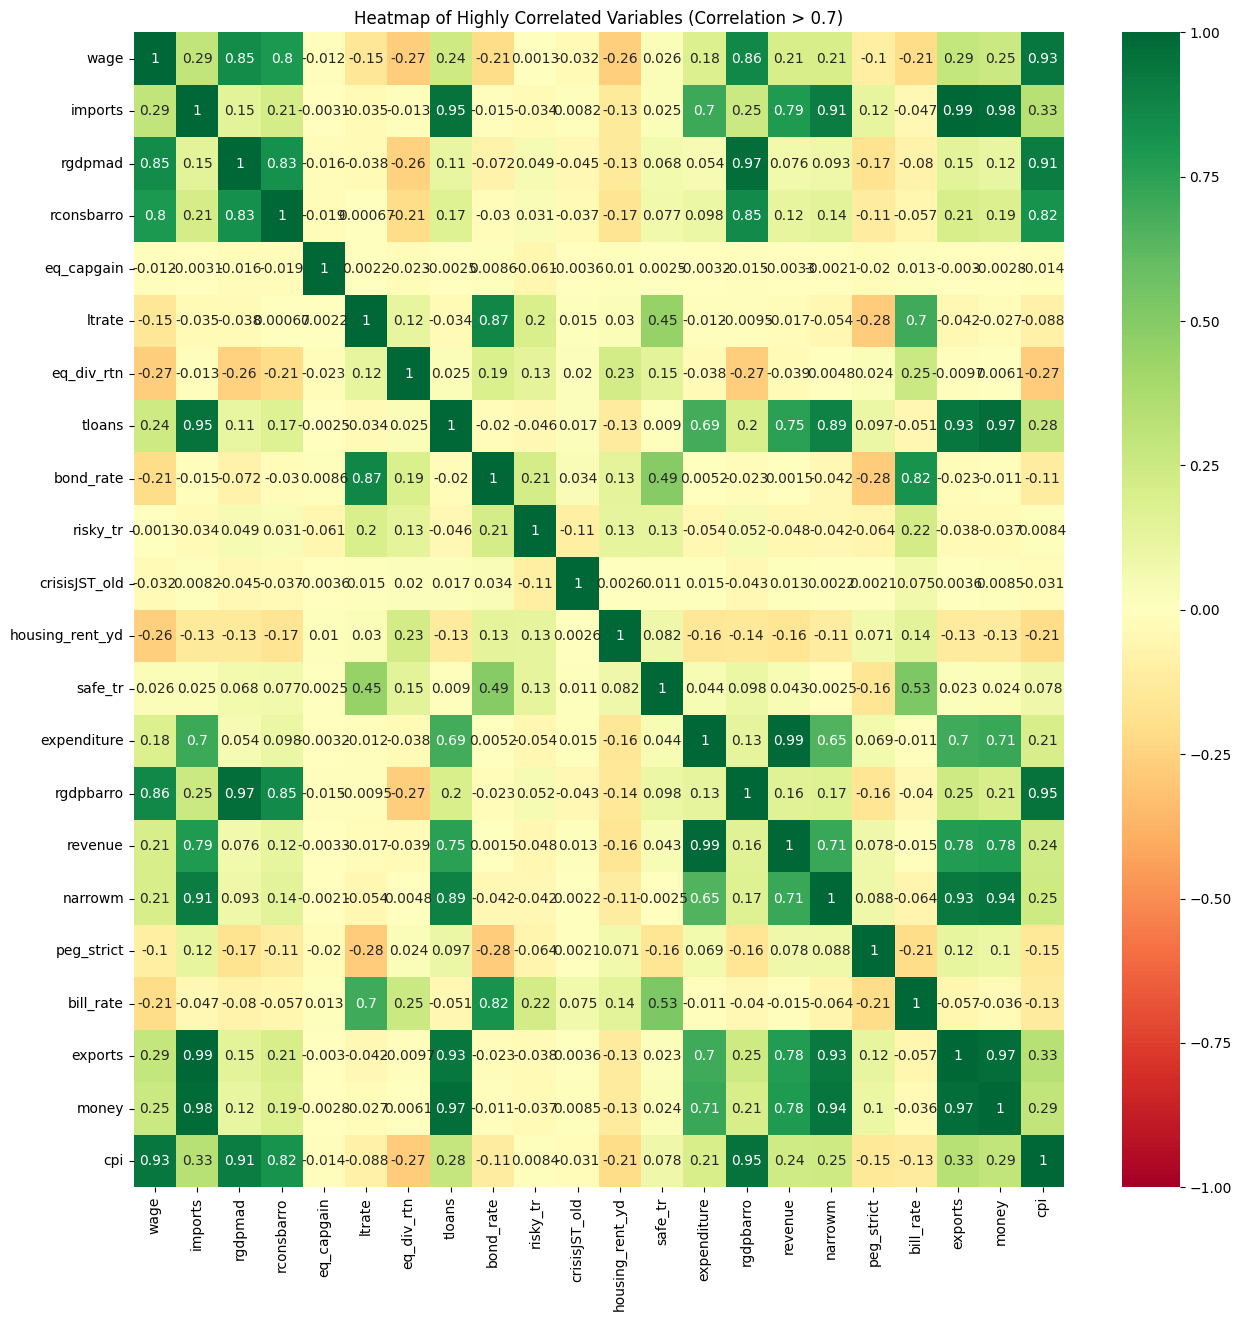

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = cookie.select_dtypes(include=[np.number])

corr_matrix = numeric_cols.corr()

high_corr_vars = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            colname = corr_matrix.columns[i]
            high_corr_vars.add(colname)

high_corr_list = list(high_corr_vars)

if high_corr_list:
    plt.figure(figsize=(15, 15))
    sns.heatmap(numeric_cols[high_corr_list].corr(), annot=True, cmap="RdYlGn", vmin=-1, vmax=1)
    plt.title("Heatmap of Highly Correlated Variables (Correlation > 0.7)")
    plt.show()
else:
    print("No highly correlated variables found")

In [ ]:
cookie.drop(['rgdpmad', 'rconsbarro', 'imports', 'exports', 'narrowm',
              'expenditure', 'eq_tr', 'housing_rent_yd', 'bill_rate', 'bond_tr'], axis=1, inplace=True)
cookie

,year,country,iso,ifs,pop,rgdpbarro,gdp,iy,cpi,ca,...,peg_base,housing_capgain,housing_rent_rtn,eq_capgain,eq_dp,bond_rate,eq_div_rtn,capital_tr,risky_tr,safe_tr
0,1870,Australia,AUS,193,1775.000000,13.836157,208.78,0.109266,2.708333,-6.147594,...,GBR,-0.045456,0.035860,-0.070045,0.071417,0.049118,0.066415,0.070633,0.096968,0.025484
1,1871,Australia,AUS,193,1675.000000,13.936864,211.56,0.104579,2.666667,5.260774,...,GBR,-0.045456,0.035860,0.041654,0.065466,0.048446,0.068193,0.070633,0.096968,0.025484
2,1872,Australia,AUS,193,1722.000000,15.044247,227.40,0.130438,2.541667,7.867636,...,GBR,0.031747,0.035860,0.108945,0.062997,0.047373,0.069861,0.070633,0.096968,0.025484
3,1873,Australia,AUS,193,1769.000000,16.219443,266.54,0.124986,2.541667,-11.047833,...,GBR,-0.030770,0.035860,0.083086,0.064484,0.046720,0.069842,0.070633,0.096968,0.025484
4,1874,Australia,AUS,193,1822.000000,16.268228,287.58,0.141960,2.666667,-5.563959,...,GBR,0.206350,0.035860,0.119389,0.063503,0.046533,0.071085,0.070633,0.096968,0.025484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2713,2016,USA,USA,111,322701.246359,108.756035,18695.10,0.195831,178.575038,-397.573000,...,GBR,0.058300,0.049627,0.014868,0.021309,0.018417,0.021626,0.048536,0.067177,0.003139
2714,2017,USA,USA,111,324756.935396,110.591099,19479.60,0.204547,182.415361,-361.702000,...,GBR,0.064388,0.048682,0.170363,0.019363,0.023300,0.022662,0.121381,0.160881,0.017584
2715,2018,USA,USA,111,326497.132575,113.306861,20527.20,0.208586,186.862052,-438.241000,...,GBR,0.065539,0.047392,0.121093,0.018716,0.029100,0.020982,0.092210,0.129585,0.000581
2716,2019,USA,USA,111,328018.681916,115.229692,21372.60,0.210205,190.247600,-472.145000,...,GBR,0.043160,0.046125,0.061144,0.019312,0.021442,0.020492,0.080606,0.084776,0.070134


##Visualizations

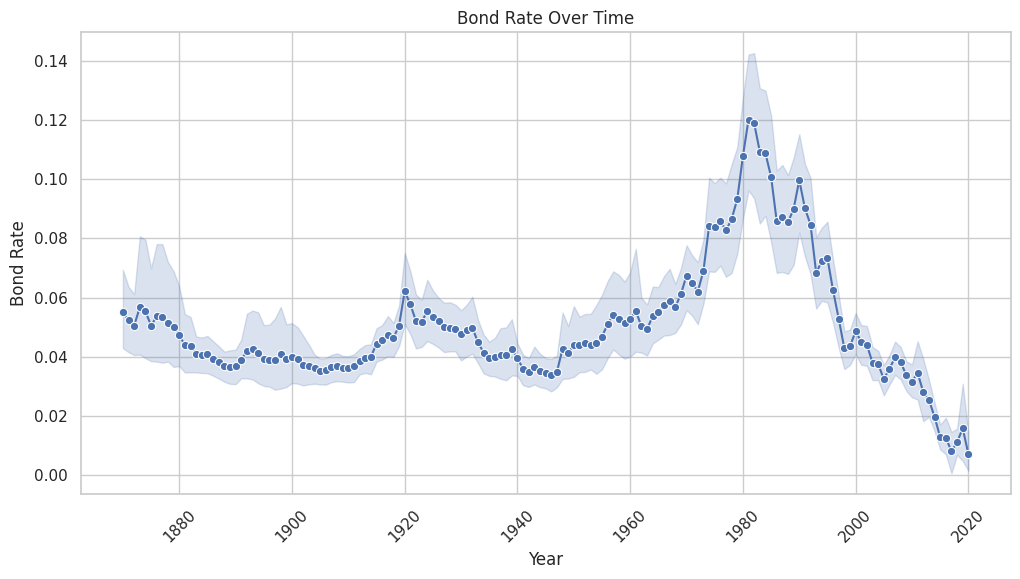

In [ ]:
# Line Chart of Bond Rate Over Time
cookie['year'] = cookie['year'].astype('category')
plt.figure(figsize=(12, 6))
sns.lineplot(data=cookie, x='year', y='bond_rate', marker='o')
plt.title('Bond Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Bond Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

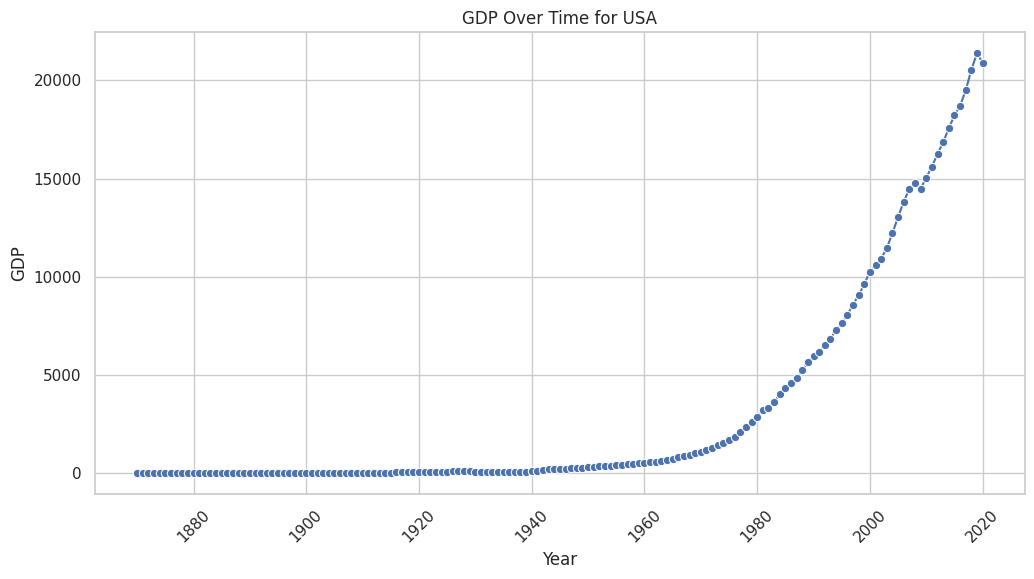

In [ ]:
# Line Chart of GDP Over Time for a Specific Country (e.g., USA)
country = 'USA'
plt.figure(figsize=(12, 6))
sns.lineplot(data=cookie[cookie['country'] == country], x='year', y='gdp', marker='o')
plt.title(f'GDP Over Time for {country}')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<ipython-input-25-3131c10c2884>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_unemployment.values, y=average_unemployment.index, palette="viridis")


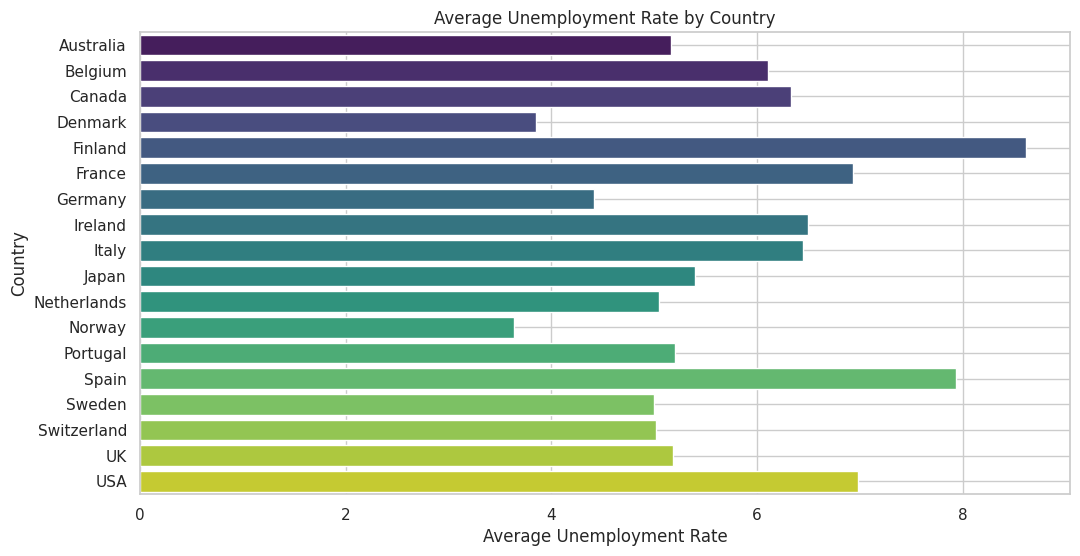

In [ ]:
# Bar Chart of Average Unemployment Rate by Country
plt.figure(figsize=(12, 6))
average_unemployment = cookie.groupby('country')['unemp'].mean().sort_values()
sns.barplot(x=average_unemployment.values, y=average_unemployment.index, palette="viridis")
plt.title('Average Unemployment Rate by Country')
plt.xlabel('Average Unemployment Rate')
plt.ylabel('Country')
plt.grid(True)
plt.show()

##Vectorization

In [ ]:
vectorizer = TfidfVectorizer(max_features=50, min_df=0.01, max_df=0.99)
text_columns = ['peg_base', 'peg_type', 'country', 'iso']
cookie_vectorized = cookie.copy()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTEN
from sklearn.model_selection import train_test_split

vectorizer = TfidfVectorizer(max_features=50, min_df=0.01, max_df=0.99)
text_columns = ['peg_base', 'peg_type', 'country', 'iso']
cookie_vectorized = cookie.copy()

for column in text_columns:
    tfidf_matrix = vectorizer.fit_transform(cookie[column].astype('str'))
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=[f"{column}_{word}" for word in vectorizer.get_feature_names_out()])
    tfidf_df = tfidf_df.astype('float64')
    cookie_vectorized = pd.concat([cookie_vectorized.drop(column, axis=1), tfidf_df], axis=1)

##Partitioning

In [ ]:
target = cookie['bond_rate']
print(target.value_counts(normalize=True))

bond_rate
0.033704    0.059603
0.003744    0.055923
0.051000    0.006623
0.045000    0.006255
0.049000    0.005151
              ...   
0.047368    0.000368
0.003795    0.000368
0.006610    0.000368
0.014194    0.000368
0.008942    0.000368
Name: proportion, Length: 1678, dtype: float64


In [ ]:
target = cookie['bond_rate']
predictors = cookie.drop(['bond_rate'],axis=1)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.3, random_state=0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(1902, 38) (816, 38) (1902,) (816,)


In [ ]:
print(predictors_train.shape)
print(target_train.shape)
print(predictors_train.head())
print(target_train.head())

(1902, 38)
(1902,)
      year   country  iso  ifs           pop  rgdpbarro            gdp  \
1148  1961   Finland  FIN  172   4475.787000  29.962453   18362.000000   
996   1960     Spain  ESP  184  30436.647234  18.392013  635380.800970   
2174  1930    Norway  NOR  142   2807.000000  13.080754    4377.000000   
228   1947   Belgium  BEL  124   8450.000000  22.215157  261754.464881   
2340  1945  Portugal  PRT  182   8038.000000  12.895034   36351.000000   

            iy        cpi         ca  ...  peg_type  peg_base  \
1148  0.279381  11.268000   -251.082  ...       PEG       USA   
996   0.189613   5.447372  23695.000  ...       PEG       USA   
2174  0.229609   4.997804    -68.000  ...       PEG    HYBRID   
228   0.189000  17.583192 -13300.000  ...     FLOAT       USA   
2340  0.300770   2.084973   -846.000  ...       PEG       USA   

      housing_capgain  housing_rent_rtn  eq_capgain     eq_dp  eq_div_rtn  \
1148         0.014091          0.114642   -0.053585  0.055996    0.0

In [ ]:
print(target_train.value_counts(normalize=True), target_train.shape)

bond_rate
0.033704    0.060463
0.003744    0.059937
0.051000    0.007361
0.045000    0.006309
0.049000    0.005258
              ...   
0.092333    0.000526
0.006550    0.000526
0.021208    0.000526
0.033200    0.000526
0.039742    0.000526
Name: proportion, Length: 1216, dtype: float64 (1902,)


In [ ]:
print(target_test.value_counts(normalize=True))

bond_rate
0.033704    0.057598
0.003744    0.046569
0.032400    0.006127
0.045000    0.006127
0.037000    0.006127
              ...   
0.039964    0.001225
0.196721    0.001225
0.064402    0.001225
0.142000    0.001225
0.161667    0.001225
Name: proportion, Length: 631, dtype: float64


In [ ]:
print("Proportion of target variable in training set:")
print(target_train.value_counts(normalize=True))

print("\nProportion of target variable in testing set:")
print(target_test.value_counts(normalize=True))

train_proportion = target_train.value_counts(normalize=True)
test_proportion = target_test.value_counts(normalize=True)

proportion_difference = train_proportion - test_proportion
print("\nDifference in proportion between training and testing sets:")
print(proportion_difference)

Proportion of target variable in training set:
bond_rate
0.033704    0.060463
0.003744    0.059937
0.051000    0.007361
0.045000    0.006309
0.049000    0.005258
              ...   
0.092333    0.000526
0.006550    0.000526
0.021208    0.000526
0.033200    0.000526
0.039742    0.000526
Name: proportion, Length: 1216, dtype: float64

Proportion of target variable in testing set:
bond_rate
0.033704    0.057598
0.003744    0.046569
0.032400    0.006127
0.045000    0.006127
0.037000    0.006127
              ...   
0.039964    0.001225
0.196721    0.001225
0.064402    0.001225
0.142000    0.001225
0.161667    0.001225
Name: proportion, Length: 631, dtype: float64

Difference in proportion between training and testing sets:
bond_rate
-0.035316   NaN
-0.008881   NaN
-0.005238   NaN
-0.005110   NaN
-0.004890   NaN
             ..
 0.215025   NaN
 0.226074   NaN
 0.229885   NaN
 0.233463   NaN
 0.237154   NaN
Name: proportion, Length: 1678, dtype: float64


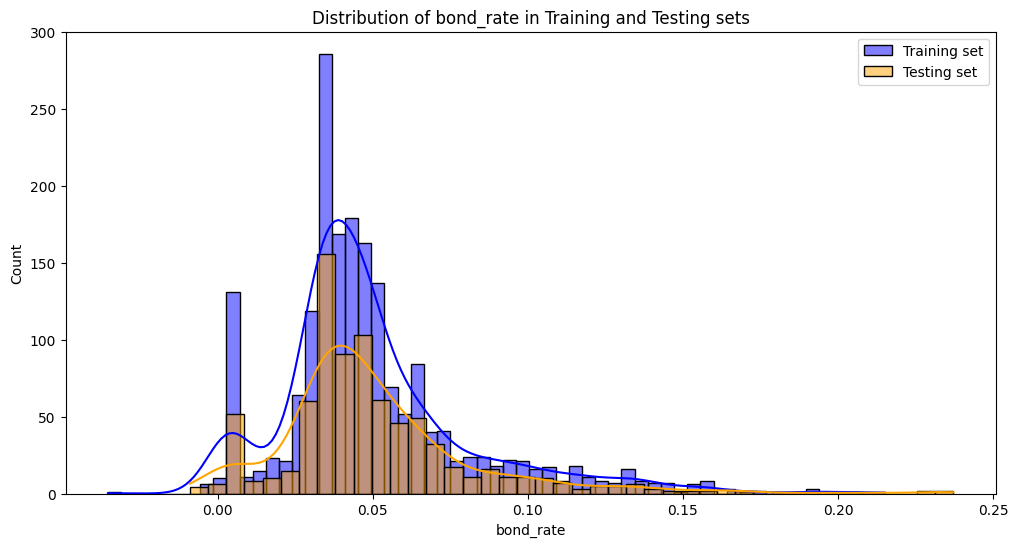

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(target_train, kde=True, color='blue', label='Training set')
sns.histplot(target_test, kde=True, color='orange', label='Testing set')
plt.title('Distribution of bond_rate in Training and Testing sets')
plt.legend()
plt.show()

In [ ]:
print("Missing values in training set:", target_train.isna().sum())
print("Missing values in testing set:", target_test.isna().sum())

Missing values in training set: 0
Missing values in testing set: 0


In [ ]:
!pip install -U imbalanced-learn

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

target = cookie['bond_rate']
predictors = cookie.drop(['bond_rate'], axis=1)

mean = target.mean()
std_dev = target.std()

num_synthetic_samples = int(len(target) * 0.5)

synthetic_targets = np.random.normal(loc=mean, scale=std_dev, size=num_synthetic_samples)
synthetic_predictors = predictors.sample(n=num_synthetic_samples, replace=True).reset_index(drop=True)

augmented_targets = pd.concat([target, pd.Series(synthetic_targets)], ignore_index=True)
augmented_predictors = pd.concat([predictors, synthetic_predictors], ignore_index=True)

predictors_train, predictors_test, target_train, target_test = train_test_split(
    augmented_predictors, augmented_targets, test_size=0.3, random_state=0
)

print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)
print("Train target distribution:\n", target_train.describe())
print("Test target distribution:\n", target_test.describe())

(2853, 38) (1224, 38) (2853,) (1224,)
Train target distribution:
 count    2853.000000
mean        0.049359
std         0.032187
min        -0.053140
25%         0.032700
50%         0.044216
75%         0.063583
max         0.237154
dtype: float64
Test target distribution:
 count    1224.000000
mean        0.050218
std         0.032287
min        -0.039164
25%         0.032796
50%         0.044263
75%         0.064367
max         0.233463
dtype: float64


In [ ]:
predictors_train_encoded = pd.get_dummies(predictors_train, drop_first=True)
predictors_test_encoded = pd.get_dummies(predictors_test, drop_first=True)

predictors_train_encoded, predictors_test_encoded = predictors_train_encoded.align(predictors_test_encoded, join='left', axis=1, fill_value=0)

## Simple Linear Regression

In [ ]:
corr_matrix = predictors_train_encoded.corrwith(target_train).abs()
most_correlated_variable = corr_matrix.idxmax()
print(f"The most correlated variable with bond_rate is {most_correlated_variable}")

model_lr_simple = LinearRegression()
model_lr_simple.fit(predictors_train_encoded[[most_correlated_variable]], target_train)

X_simple = sm.add_constant(predictors_train_encoded[[most_correlated_variable]])
est_simple = sm.OLS(target_train, X_simple)
est2_simple = est_simple.fit()
print(est2_simple.summary())

predictions_lr_simple = model_lr_simple.predict(predictors_test_encoded[[most_correlated_variable]])

mae_lr_simple = mean_absolute_error(target_test, predictions_lr_simple)
rmse_lr_simple = mean_squared_error(target_test, predictions_lr_simple, squared=False)
print("MAE:", mae_lr_simple)
print("RMSE:", rmse_lr_simple)

The most correlated variable with bond_rate is ltrate
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     1168.
Date:                Wed, 17 Jul 2024   Prob (F-statistic):          8.39e-215
Time:                        18:44:55   Log-Likelihood:                 6245.4
No. Observations:                2853   AIC:                        -1.249e+04
Df Residuals:                    2851   BIC:                        -1.247e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

##Random Forest classifier Model

In [ ]:
scaler = StandardScaler()
predictors_train_scaled = scaler.fit_transform(predictors_train_encoded)
predictors_test_scaled = scaler.transform(predictors_test_encoded)

model_rf = RandomForestRegressor(random_state=1)
model_rf.fit(predictors_train_scaled, target_train)

predictions_rf = model_rf.predict(predictors_test_scaled)

mae_rf = mean_absolute_error(target_test, predictions_rf)
rmse_rf = mean_squared_error(target_test, predictions_rf, squared=False)
print("MAE:", mae_rf)
print("RMSE:", rmse_rf)

MAE: 0.01906373922484028
RMSE: 0.028767396680153313


## Multiple Linear Regression

In [ ]:
predictors_train_encoded = predictors_train_encoded.astype(float)
predictors_test_encoded = predictors_test_encoded.astype(float)

most_correlated_variable = predictors_train_encoded.corrwith(target_train).abs().idxmax()
print(f"The most correlated variable with bond_rate is {most_correlated_variable}")

model_lr_simple = LinearRegression()
model_lr_simple.fit(predictors_train_encoded[[most_correlated_variable]], target_train)

X_simple = sm.add_constant(predictors_train_encoded[[most_correlated_variable]])
est_simple = sm.OLS(target_train, X_simple)
est2_simple = est_simple.fit()
print(est2_simple.summary())

predictions_lr_simple = model_lr_simple.predict(predictors_test_encoded[[most_correlated_variable]])

mae_lr_simple = mean_absolute_error(target_test, predictions_lr_simple)
rmse_lr_simple = mean_squared_error(target_test, predictions_lr_simple, squared=False)
print("MAE (Simple Linear Regression):", mae_lr_simple)
print("RMSE (Simple Linear Regression):", rmse_lr_simple)

model_lr_multiple = LinearRegression()
model_lr_multiple.fit(predictors_train_encoded, target_train)

X_multiple = sm.add_constant(predictors_train_encoded)
est_multiple = sm.OLS(target_train, X_multiple)
est2_multiple = est_multiple.fit()
print(est2_multiple.summary())

predictions_lr_multiple = model_lr_multiple.predict(predictors_test_encoded)

mae_lr_multiple = mean_absolute_error(target_test, predictions_lr_multiple)
rmse_lr_multiple = mean_squared_error(target_test, predictions_lr_multiple, squared=False)
print("MAE (Multiple Linear Regression):", mae_lr_multiple)
print("RMSE (Multiple Linear Regression):", rmse_lr_multiple)

The most correlated variable with bond_rate is ltrate
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     1168.
Date:                Wed, 17 Jul 2024   Prob (F-statistic):          8.39e-215
Time:                        18:46:23   Log-Likelihood:                 6245.4
No. Observations:                2853   AIC:                        -1.249e+04
Df Residuals:                    2851   BIC:                        -1.247e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

##Regression Trees

MAE (Decision Tree Regressor): 0.022438444749470727
RMSE (Decision Tree Regressor): 0.034358496758854544


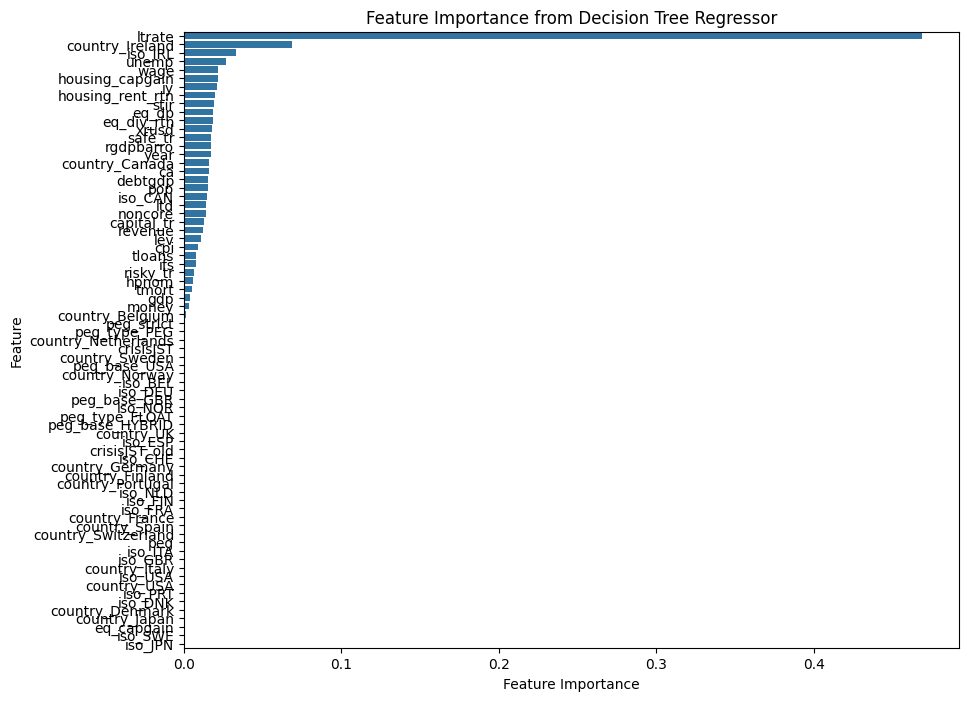

In [ ]:
predictors_train_encoded = predictors_train_encoded.astype(float)
predictors_test_encoded = predictors_test_encoded.astype(float)

scaler = StandardScaler()
predictors_train_scaled = scaler.fit_transform(predictors_train_encoded)
predictors_test_scaled = scaler.transform(predictors_test_encoded)

model_tree = DecisionTreeRegressor(random_state=1)
model_tree.fit(predictors_train_scaled, target_train)

predictions_tree = model_tree.predict(predictors_test_scaled)

mae_tree = mean_absolute_error(target_test, predictions_tree)
rmse_tree = mean_squared_error(target_test, predictions_tree, squared=False)
print("MAE (Decision Tree Regressor):", mae_tree)
print("RMSE (Decision Tree Regressor):", rmse_tree)

plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Decision Tree Regressor')
plt.show()

##SVR model

In [ ]:
scaler = StandardScaler()
predictors_train_scaled = scaler.fit_transform(predictors_train_encoded)
predictors_test_scaled = scaler.transform(predictors_test_encoded)

In [ ]:
C_values = range(1, 101)
mae_values = []
rmse_values = []

for C in C_values:
    model_svr = SVR(C=C)
    model_svr.fit(predictors_train_scaled, target_train)
    predictions_svr = model_svr.predict(predictors_test_scaled)
    mae_values.append(mean_absolute_error(target_test, predictions_svr))
    rmse_values.append(mean_squared_error(target_test, predictions_svr, squared=False))

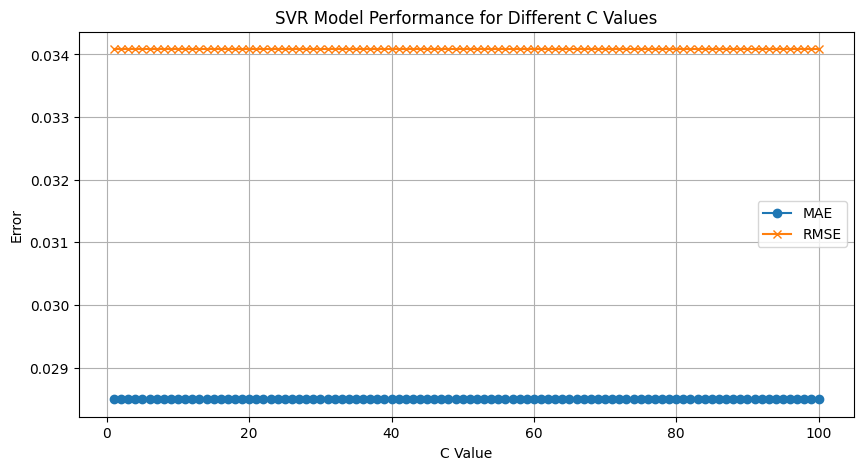

    C Value       MAE      RMSE
0         1  0.028495  0.034083
1         2  0.028495  0.034083
2         3  0.028495  0.034083
3         4  0.028495  0.034083
4         5  0.028495  0.034083
..      ...       ...       ...
95       96  0.028495  0.034083
96       97  0.028495  0.034083
97       98  0.028495  0.034083
98       99  0.028495  0.034083
99      100  0.028495  0.034083

[100 rows x 3 columns]


In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(C_values, mae_values, label='MAE', marker='o')
plt.plot(C_values, rmse_values, label='RMSE', marker='x')
plt.xlabel('C Value')
plt.ylabel('Error')
plt.title('SVR Model Performance for Different C Values')
plt.legend()
plt.grid(True)
plt.show()

data = {
    "C Value": list(C_values),
    "MAE": mae_values,
    "RMSE": rmse_values
}

df = pd.DataFrame(data)
print(df)

##MLP model

In [ ]:
model_mlp = MLPRegressor(hidden_layer_sizes=(16, 8), random_state=1)
model_mlp.fit(predictors_train_scaled, target_train)

MLPRegressor(hidden_layer_sizes=(16, 8), random_state=1)

In [ ]:
predictions_mlp = model_mlp.predict(predictors_test_scaled)

In [ ]:
mae_mlp = mean_absolute_error(target_test, predictions_mlp)
rmse_mlp = mean_squared_error(target_test, predictions_mlp, squared=False)
print("MAE:", mae_mlp)
print("RMSE:", rmse_mlp)


MAE: 0.059254934852122416
RMSE: 0.08457204849810525
